# ***Importing data from csv***

---



In [ ]:
import os
import tarfile
from six.moves import urllib

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
# HOUSING_PATH = "drive/MyDrive/ColabData/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

# ***Quick look at the data structure***


---



In [ ]:
import pandas as pd

In [ ]:
housing = pd.read_csv('drive/MyDrive/ColabData/housing/housing.csv')

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

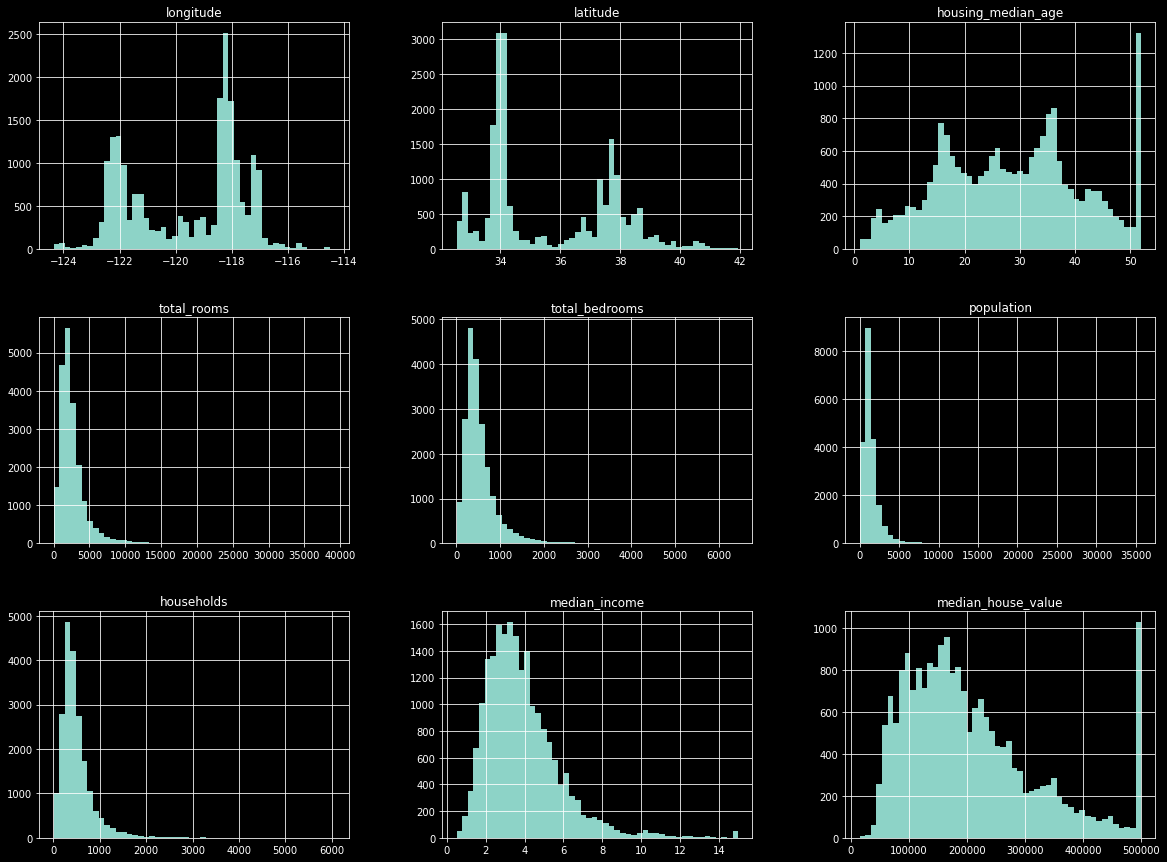

In [ ]:
housing.hist(figsize=(20,15), bins = 50)
plt.show()

# **Train-Test Splitting**


---



In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(housing))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f'test : {len(test_set)}\ntrain : {len(train_set)}')

test : 4128
train : 16512


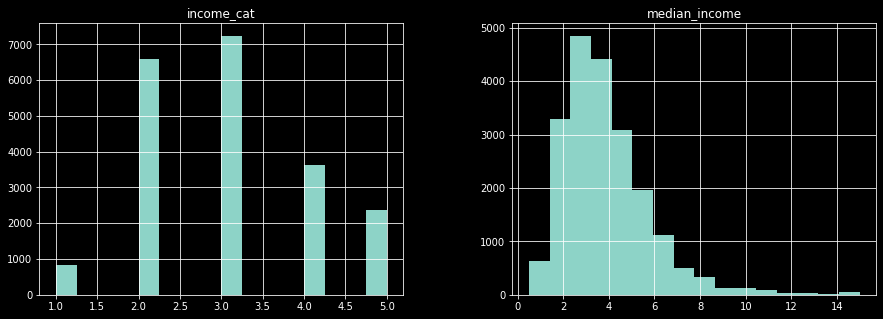

In [ ]:
# suppose meadian income is a very important attribute
# ensure test set is representative of various income categories

# create an income category attribute from the continuous numerical attribute

# do not have not too many strata
# each stratum should be large enough

# limit the categories and round up using ceil
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

housing.hist(column=['income_cat', 'median_income'], figsize=(15,5), bins=16)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
print(f'strat_test : {len(strat_test_set)}\nstrat_train : {len(strat_train_set)}')

strat_test : 4128
strat_train : 16512


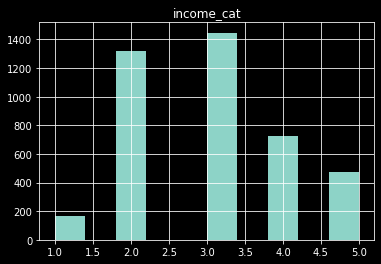

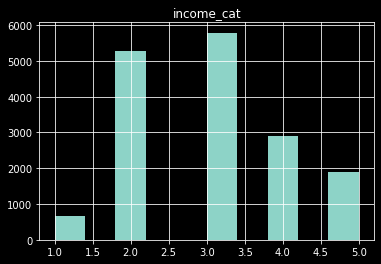

In [ ]:
strat_test_set.hist(column='income_cat')
strat_train_set.hist(column='income_cat')
plt.show()

In [ ]:
# now bring back the data to the original state

for set in (strat_test_set, strat_train_set):
    set.drop(['income_cat'], axis=1, inplace=True)

## Copy the Train set

In [ ]:
housing = strat_train_set.copy()

# Visualizing Geographical Data


---


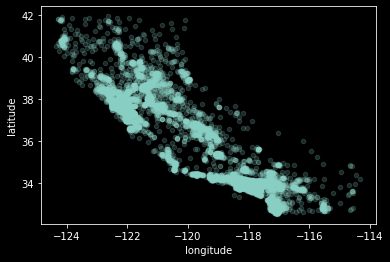

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

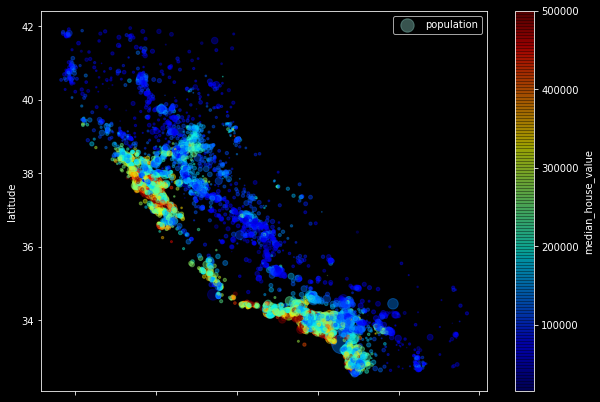

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10,7),
                s=housing['population']/100, label='population',
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            )
plt.legend()

# Looking for Correlations

---

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

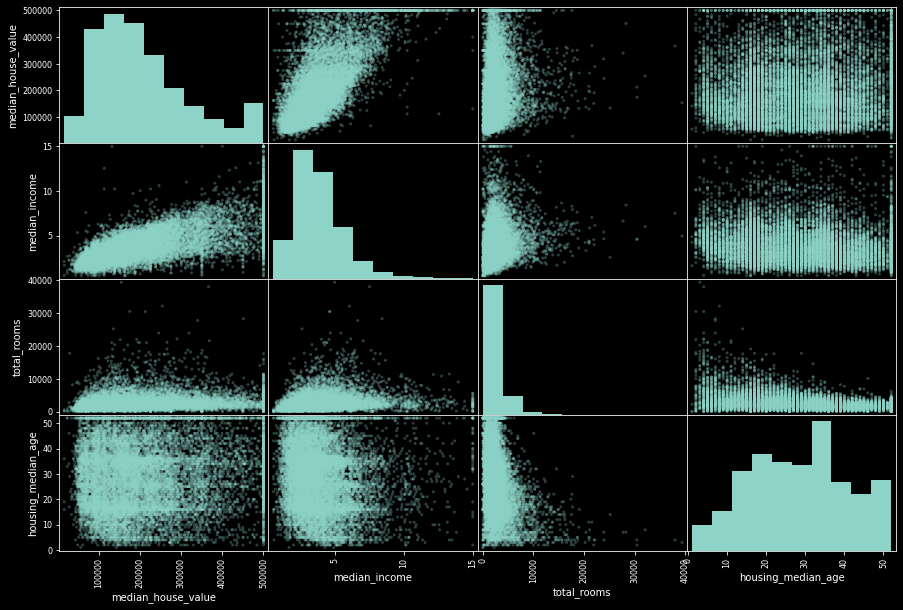

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15,10), alpha=0.3)
plt.show()

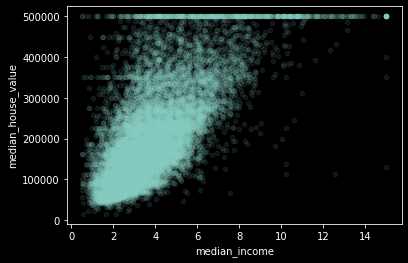

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
# strong positive correlation
# remove the horizontal outliers
# prevent your algorithm to
# reporduce these data quirks

# ***Experimenting Attribute Combinations***

---

In [ ]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

# positive corelation of rooms_per_household is stronger than that of median_age
# strong negative corelation of bedrooms_per_room

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

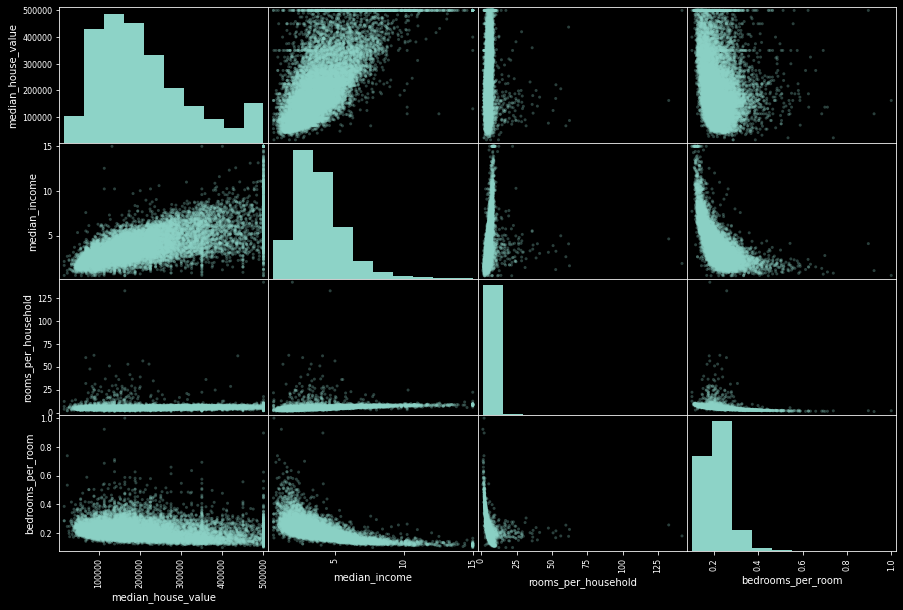

In [ ]:
attributes = ["median_house_value", "median_income", "rooms_per_household", "bedrooms_per_room"]
scatter_matrix(housing[attributes], figsize=(15,10), alpha=0.3)
plt.show()

# ***Preparing the Data***
---

In [ ]:
housing = strat_train_set.drop(columns='median_house_value')
housing_labels = strat_train_set['median_house_value'].copy()

## ***Missing Attributes***

You have three options:
* Get rid of the corresponding datapoints.

        housing.dropna(subset=["total_bedrooms"])

* Get rid of the whole attribute.
        housing.drop("total_bedrooms", axis=1) 

* Set the values to some value (zero, the mean, the median, etc.).
        median = housing["total_bedrooms"].median()
        housing["total_bedrooms"].fillna(median) 


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# median can only be calculated on numerical values
# so create a copy without ocean_proximity column
housing_num = housing.drop(columns='ocean_proximity')

In [ ]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
# median of each attribute is stored in statistics_ instance

# this is done because
# we cannot be sure that there won't be any missing values
# in any column in the new data after it goes live
# so it is safer to apply imputer to all attributes

print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [ ]:
# now use this trained imputer to transform the training set
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## ***Categorical Attributes***


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [ ]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [ ]:
print(housing_cat)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object
